# Soil data analysis
---

* Our main goal is to compare data and see which sensor is more reliable for measurements. We will also try to find correlation between moisture and soil temperature.


* We have available 6 datasets split into 3 sensors, where each sensor has 2 different types of soils. We will start by loading datasets into dictionary, which give us easy way to approach data.

---

In [1]:
# importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# add names of our data into list
list_data = ['L10_switch4', 'L11_switch4', 'L13_sensor123','L23_sensor123', 'L03_sensor003', 'L14_sensor003']

# loading data to dictionary
data = {}
for i in list_data:
    value = pd.read_csv('datasets/{}.csv'.format(i))
    data[i] = value

# display first 3 rows of each dataset    
for key, value in data.items():
    print('{}\n{}\n'. format(key, data[key].head(3)))

L10_switch4
     Moisture  Soil_temp         EC                 time
0  21007502.0      21.75  3697675.0  2020-10-28 12:47:07
1  21013755.0      21.75  3697738.0  2020-10-28 12:47:25
2  21012381.0      21.75  3698120.0  2020-10-28 12:47:31

L11_switch4
     Moisture  Soil_temp         EC                 time
0  21287378.0      22.06  3697202.0  2020-10-05 15:01:35
1  21287378.0      22.06  3696634.0  2020-10-05 15:01:47
2  21284758.0      22.06  3696690.0  2020-10-05 15:01:53

L13_sensor123
     Moisture  Soil_temp  Air_Hum  Air_temp          EC                 time
0  21444978.0      20.18        0         0  20381229.0  2020-10-13 16:40:05
1  21442561.0      20.31        0         0  20380214.0  2020-10-14 09:22:48
2  21420624.0      19.68        0         0  20368888.0  2020-10-14 09:30:57

L23_sensor123
     Moisture  Soil_temp  Air_Hum  Air_temp          EC                 time
0  21548264.0      21.56        0         0  20543416.0  2020-10-28 10:55:58
1  21548590.0      21.62   

---
* Some soils have additional columns Air_Hum and Air_temp. These features were not measured so we can drop them. 

---

In [3]:
# drop Air_Hum, Air_temp columns

drop_data = ['L13_sensor123', 'L23_sensor123', 'L03_sensor003']

for i in drop_data:
    data[i] = data[i].drop(['Air_Hum', 'Air_temp'], axis = 1)

---
## Plotting Moisture of All Sensors
   
---
* Plotting moisture can provide easy way to check quality of data.


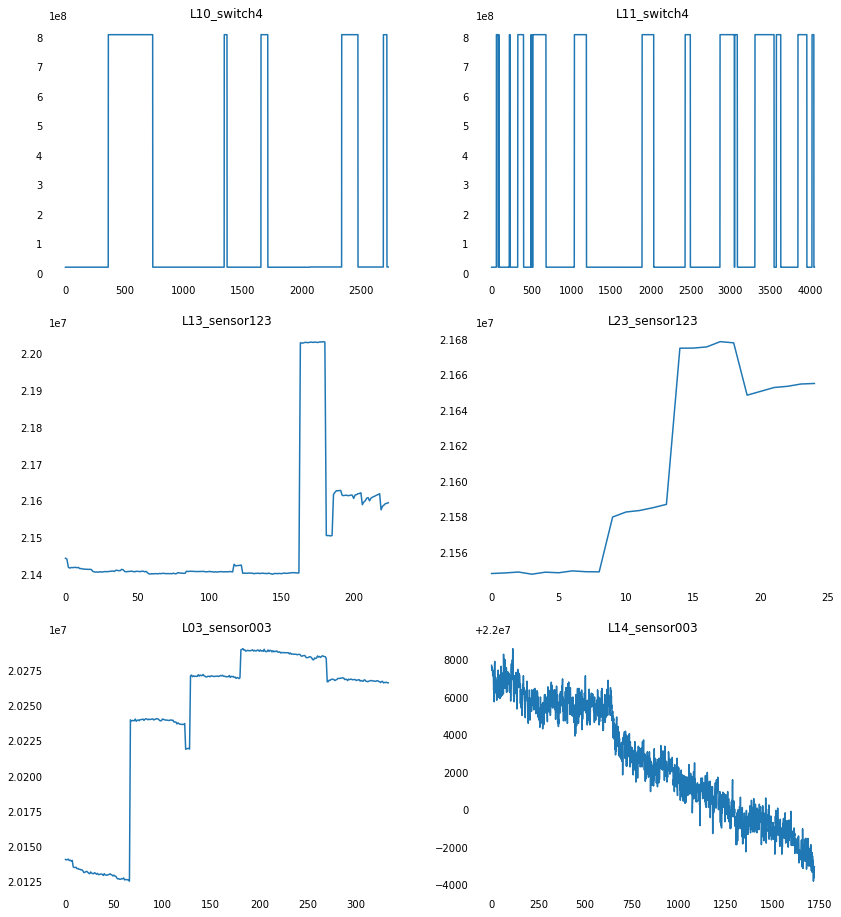

In [4]:
# create figure
fig = plt.figure(figsize = (14, 16))

for i in range(0,6):
    # add new graph
    ax = fig.add_subplot(3,2,i+1)
    # plot graph
    ax.plot(data[list_data[i]]['Moisture'], label = 'Moisture')
    # set title of graph
    ax.set_title(list_data[i])
    # remove spines
    for key in ax.spines:
        ax.spines[key].set_visible(False)
    # remove ticks
    ax.tick_params(bottom = False, top = False, left = False, right = False)



---
* Sensors 123 and 003 have the similar range of values, but switch4 has some extreme values. We can observe this pattern with any data measured by switch4 and below we can see big difference between minimal and maximal values.   
   
   
* Sensor003 seems to be the only one with meaningful values, where on L14 soil we can actually observe how moisture is decreasing over time, therefore we will focus our analysis on this sensor.

---

In [5]:
print('Moisture L10_switch4\n\nmin: {}\nmax: {}'.format(data['L10_switch4']['Moisture'].min(), data['L10_switch4']['Moisture'].max()))


Moisture L10_switch4

min: 20825129.0
max: 810942143.0


---
## Exploring Sensor003
---

In [6]:
# loading data to variables
L14 = data['L14_sensor003']
L03 = data['L03_sensor003']

# function to retrieve the name of dataset
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][-1]
    return name


---
* With function get_df_name we can get name pandas dataframe which will be useful. Resource of this function can be found here:  

https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe


* We can now create plots of all features for both soils.

---

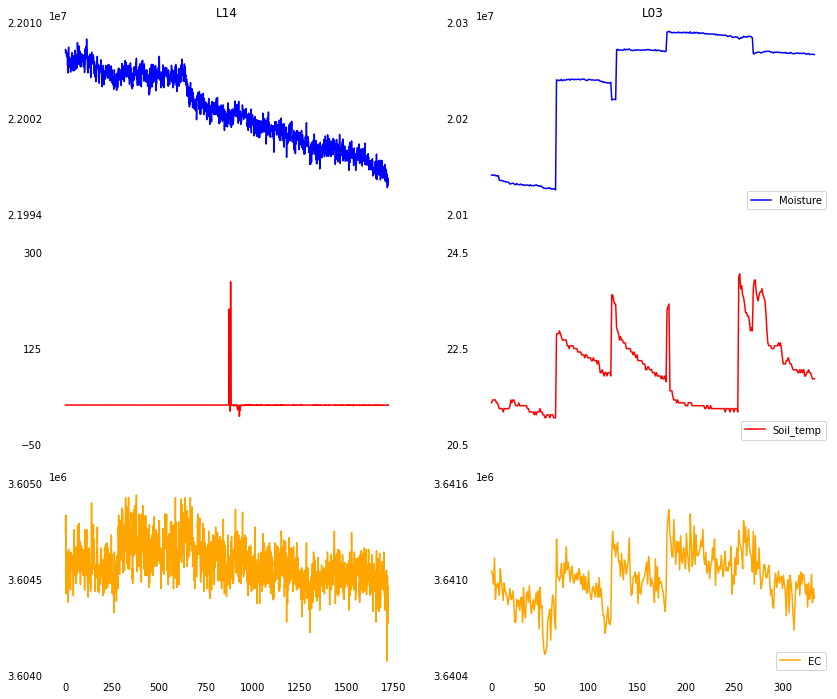

In [7]:
def plot_sensor(df1, df2):
    
    # add features and colors into list
    features = ['Moisture', 'Soil_temp', 'EC']
    colors = ['blue', 'red', 'orange']
    
    # creating figure
    fig = plt.figure(figsize = (14, 12))
    
    # plot first dataframe
    for i in range(0, 6, 2):
        ax = fig.add_subplot(3,2,i+1)
        # plot features
        ax.plot(df1[features[int(i/2)]], label = features[int(i/2)], c = colors[int(i/2)])
        # disabling spines around graph
        for key in ax.spines:
            ax.spines[key].set_visible(False)
        # removing ticks and bottom label
        ax.tick_params(bottom = False, top = False, left = False, right = False, labelbottom = False)
        # set y labels
        yticks = ax.get_yticks()
        ax.set_yticks([min(yticks), np.median(yticks), max(yticks)])        
        # set title at the beginning using function get_df_name()
        if int(i/2) == 0:
            ax.set_title(get_df_name(df1))
        # set label bottom at the end   
        elif int(i/2) == 2:
            ax.tick_params(labelbottom = True)
 
    
    # plot second dataframe   
    for i in range(1, 7, 2):
        ax = fig.add_subplot(3,2,i+1)
        # plot features
        ax.plot(df2[features[int(i/2)]], label = features[int(i/2)], c = colors[int(i/2)])
        # disabling spines around graph
        for key in ax.spines:
            ax.spines[key].set_visible(False)
        # removing ticks and bottom label
        ax.tick_params(bottom = False, top = False, left = False, right = False, labelbottom = False)
        # set y labels
        yticks = ax.get_yticks()
        ax.set_yticks([min(yticks), np.median(yticks), max(yticks)])
        # set title at the beginning 
        if int(i/2) == 0:
            ax.set_title(get_df_name(df2))
        # set label bottom at the end 
        if int(i/2) == 2:
            ax.tick_params(labelbottom = True)
        # add legend   
        plt.legend(loc = 'lower right')         

    return ax

sensor003 = plot_sensor(L14, L03)
                               

---
* L14 Soil_temp have some outliers (extreme values). Let's see statistics of this temperature. 

---

In [8]:
L14['Soil_temp'].describe()

count    1725.000000
mean       22.508991
std         8.670511
min         1.500000
25%        21.930000
50%        22.060000
75%        22.120000
max       247.000000
Name: Soil_temp, dtype: float64

---
* Min value of Soil_temp 1.5 and max value 247. Below we inspect them further.

---

In [9]:
# filter temperature higher than 30
high_temp = L14[L14['Soil_temp'] > 30]
high_temp

,Moisture,Soil_temp,EC,time
873,22002357.0,197.18,3604586.0,2020-10-09 12:47:15
874,22002107.0,101.50,3604470.0,2020-10-09 12:47:26
875,22002190.0,47.43,3604545.0,2020-10-09 12:47:39
876,22002740.0,127.93,3604620.0,2020-10-09 12:47:51
877,22002065.0,127.93,3604586.0,2020-10-09 12:48:04
878,22002357.0,127.93,3604545.0,2020-10-09 12:48:16
882,22002190.0,247.00,3604558.0,2020-10-09 12:49:03
883,22002149.0,107.25,3604592.0,2020-10-09 12:49:14


In [10]:
# filter temperature below 20
low_temp = L14[L14['Soil_temp'] < 20]
low_temp

,Moisture,Soil_temp,EC,time
880,22001466.0,11.00,3604449.0,2020-10-09 12:48:39
919,22002656.0,13.31,3604729.0,2020-10-09 12:56:32
922,22002274.0,19.37,3604586.0,2020-10-09 12:57:07
925,22003422.0,16.68,3604729.0,2020-10-09 12:57:44
929,22002065.0,1.50,3604661.0,2020-10-09 12:58:30
931,22001807.0,11.93,3604572.0,2020-10-09 12:58:52
935,22002448.0,19.81,3604613.0,2020-10-09 12:59:53


---
* We could see on graph and also from tables above that these outliers occur in same horizon of time, therefore we can remove them.

---

In [11]:
# choosing rows where soil_temp is above 30 and below 20
L14 = L14[(L14['Soil_temp'] > 20) & (L14['Soil_temp'] < 30)]

In [12]:
L14['Soil_temp'].describe()

count    1710.000000
mean       22.017696
std         0.221172
min        20.120000
25%        21.930000
50%        22.060000
75%        22.120000
max        23.060000
Name: Soil_temp, dtype: float64

---
* Soil_temp looks fine now, let's plot sensor003 again.

---

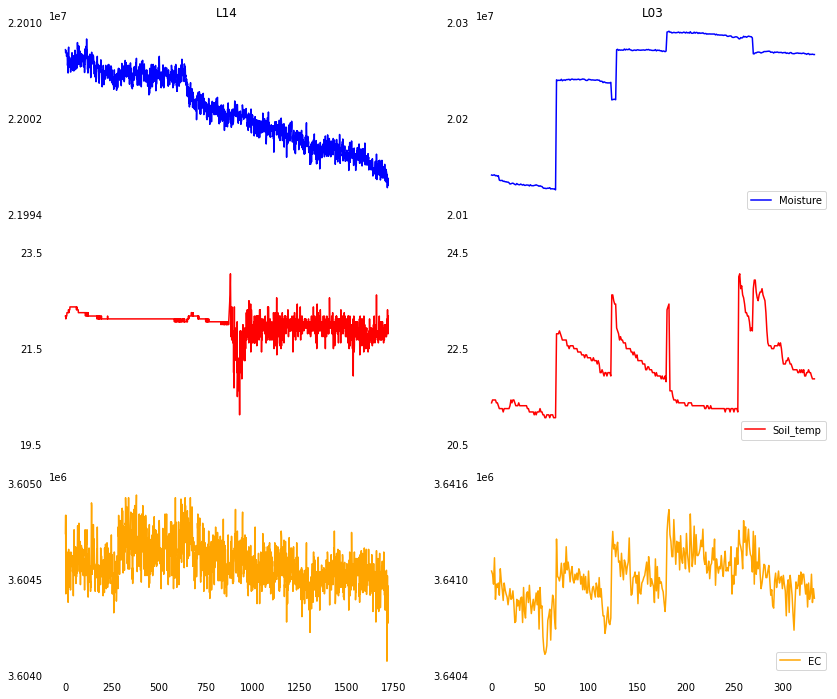

In [13]:
plot_sensor(L14, L03)

---

* L03 differs from L14, because we conducted different experiment with this soil. With L14 we measured soil continuosly without any interference. But L03  was measured for 90 minutes and then heated in oven for another 90 minutes. We repeated this cycle 3 times per day and we can observe this pattern on our graphs as rapidly increased values. 


* With soil_temp it's reasonable that values increased after heating, but with moisture we expected decrease. The reason why the moisture increased after the heating could be due to various reasons, for example changed position of coil in soil or problem with decoding, that could explain also many digits number.

---

## Correlation Between Moisture and Soil Temperature
---

* Let's see if we can find correlation between Moisture and Soil temperature. We will do that by displaying scatter plot and correlation matrix. Our predictions are that moisture decreases as soil temperature increases.


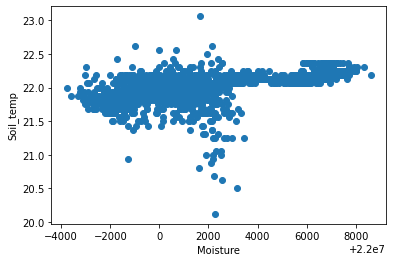

In [14]:
# plotting scatter plot 
fig, ax = plt.subplots()
ax.scatter(L14['Moisture'], L14['Soil_temp'])

# set labels of features
ax.set_xlabel('Moisture')
ax.set_ylabel('Soil_temp')

plt.show()

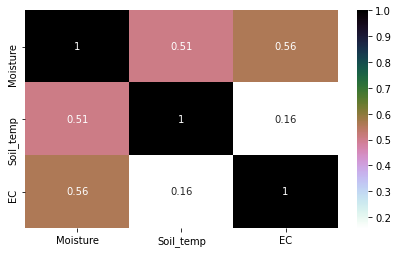

In [15]:
# displaying correlation matrix
plt.figure(figsize=(7,4)) 
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
sns.heatmap(L14.corr(),annot=True,cmap='cubehelix_r') 
plt.show()


---
* There is a weak correlation between moisture and temperature. What causes problem for our observations is behaviour of moisture mentioned before and small range of soil temperature.


* Soil temperature for L14 ranges between 19.5 and 23.5. In our experiment with heating L03 in oven, the value just slightly increased to 24.5, although actual values reached above 30 degrees. 

---